In [313]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [314]:
reatil_df=pd.read_csv("Online+Retail.csv", sep=',',encoding="ISO-8859-1")

In [315]:
reatil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [316]:
reatil_df.shape

(541909, 8)

In [317]:
reatil_df.isnull().sum()/len(reatil_df)

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

In [318]:
reatil_df= reatil_df.dropna()

In [319]:
reatil_df.shape

(406829, 8)

#Data preaparation
1. R-Recency
2. F-Frequency
3. M-monetory value

In [321]:
#Monetory value
reatil_df['amount'] = reatil_df['Quantity']*reatil_df['UnitPrice']
reatil_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [322]:
grouped_data=reatil_df.groupby('CustomerID')['amount'].sum()


In [323]:
grouped_data=grouped_data.reset_index()

In [324]:
#frequency
frequency=reatil_df.groupby("CustomerID")['InvoiceNo'].count()

In [325]:
frequency=frequency.reset_index()

In [326]:
frequency.columns=["CustomerID", "Frequency"]

In [327]:
grouped_data=pd.merge(grouped_data,frequency, on="CustomerID", how="inner")

In [328]:
#recency
reatil_df['InvoiceDate']=pd.to_datetime(reatil_df['InvoiceDate'], format="%d-%m-%Y %H:%M")

In [329]:
reatil_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [330]:
marker_date=max(reatil_df['InvoiceDate'])

In [331]:
 marker_date

Timestamp('2011-12-09 12:50:00')

In [332]:
reatil_df['diff']=reatil_df['InvoiceDate'] - marker_date

In [333]:
last_purchase=reatil_df.groupby("CustomerID")['diff'].min()
last_purchase.reset_index()


,CustomerID,diff
0,12346.0,-326 days +21:11:00
1,12347.0,-367 days +02:07:00
2,12348.0,-358 days +06:19:00
3,12349.0,-19 days +21:01:00
4,12350.0,-310 days +03:11:00
...,...,...
4367,18280.0,-278 days +21:02:00
4368,18281.0,-181 days +22:03:00
4369,18282.0,-126 days +00:45:00
4370,18283.0,-337 days +01:24:00


In [334]:
grouped_data=pd.merge(grouped_data,last_purchase, on="CustomerID")

In [335]:
grouped_data.head()

,CustomerID,amount,Frequency,diff
0,12346.0,0.00,2,-326 days +21:11:00
1,12347.0,4310.00,182,-367 days +02:07:00
2,12348.0,1797.24,31,-358 days +06:19:00
3,12349.0,1757.55,73,-19 days +21:01:00
4,12350.0,334.40,17,-310 days +03:11:00


In [336]:
grouped_data.columns = ['CustomerID', 'amount', 'frequency', 'recency']

In [337]:
import datetime as dt

In [338]:
grouped_data['recency']= grouped_data.recency.dt.days

In [339]:
?sns.boxplot

Signature:
sns.boxplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    dodge='auto',
    width=0.8,
    gap=0,
    whis=1.5,
    linecolor='auto',
    linewidth=None,
    fliersize=None,
    hue_norm=None,
    native_scale=False,
    log_scale=None,
    formatter=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative
data in a way that facilitates comparisons between variables or across
levels of a categorical variable. The box shows the quartiles of the
dataset while the whiskers extend to show the rest of the distribution,
except for points that are determined to be "outliers" using a method
that is a function of the inter-quartile range.

See the :ref:`tutorial <categorical_tutorial>` for more i

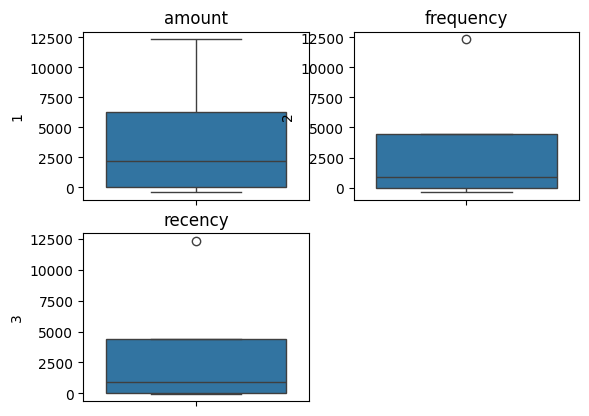

In [340]:
fig=plt.figure()
for k in [1,2,3]:
    plt.subplot(2,2,k)
    sns.boxplot(grouped_data.iloc[k])
    plt.title(grouped_data.columns[k])

# There are 2 types of preprocessing needs to be done
1. Outlier handline
2. Scaling

In [342]:
Q1 = grouped_data.amount.quantile(0.05)
Q3 = grouped_data.amount.quantile(0.95)
IQR = Q3 - Q1
grouped_data = grouped_data[(grouped_data.amount >= Q1 - 1.5*IQR) & (grouped_data.amount <= Q3 + 1.5*IQR)]

In [343]:
Q1 = grouped_data.frequency.quantile(0.05)
Q3 = grouped_data.frequency.quantile(0.95)
IQR = Q3 - Q1
grouped_data = grouped_data[(grouped_data.frequency >= Q1 - 1.5*IQR) & (grouped_data.frequency <= Q3 + 1.5*IQR)]

In [344]:
Q1 = grouped_data.recency.quantile(0.05)
Q3 = grouped_data.recency.quantile(0.95)
IQR = Q3 - Q1
grouped_data = grouped_data[(grouped_data.recency >= Q1 - 1.5*IQR) & (grouped_data.recency <= Q3 + 1.5*IQR)]

In [345]:
# Scaling
from sklearn.preprocessing import StandardScaler

In [346]:
scaler= StandardScaler()

In [347]:
scaled_data=pd.DataFrame(scaler.fit_transform(grouped_data))

In [348]:
scaled_data.shape

(4293, 4)

In [349]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [350]:
scaled_data.columns = ['CustomerID','amount', 'frequency', 'recency']

In [351]:
#Initialiing model
from sklearn.cluster import KMeans

In [352]:
kmean=KMeans(n_clusters=4, max_iter=50)

In [353]:
kmean.fit(scaled_data)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

In [354]:
kmean.labels_

array([2, 1, 2, ..., 3, 3, 3], dtype=int32)

In [355]:
error=[]
for k in range(2,12,2):
    kmean=KMeans(n_clusters=k, max_iter=50)
    kmean.fit(scaled_data)
    error.append([k,kmean.inertia_])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [356]:
SSD=pd.DataFrame(error, columns=['No of clusters','SSD'])
SSD

,No of clusters,SSD
0,2,11872.751427
1,4,7058.701878
2,6,5260.177591
3,8,4316.208985
4,10,3794.348468


<Axes: xlabel='No of clusters', ylabel='SSD'>

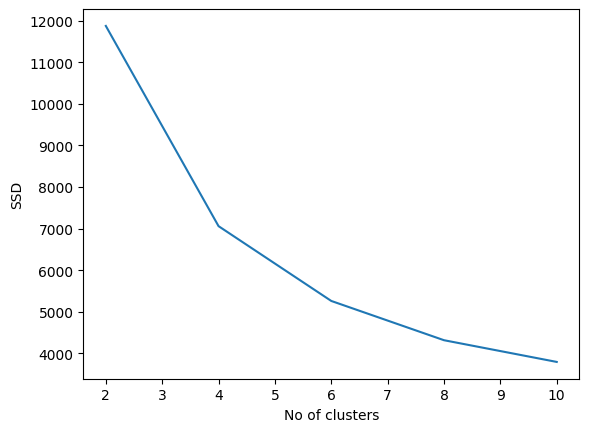

In [357]:
sns.lineplot(data=SSD,x="No of clusters", y='SSD')

In [358]:
#Silhauette analysis
from sklearn.metrics import silhouette_score

In [359]:
silhauette_avg=[]
for k in range(2,12,2):
    kmean=KMeans(n_clusters=k, max_iter=50)
    kmean.fit(scaled_data)
    sa=silhouette_score(scaled_data,kmean.labels_)
    silhauette_avg.append([k,sa])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [360]:
silhauette_avg

[[2, 0.43532137022037526],
 [4, 0.30822251079903273],
 [6, 0.3080526938391747],
 [8, 0.3093088013361048],
 [10, 0.28591145656221867]]

In [361]:
k=3
kmean=KMeans(n_clusters=k, max_iter=50)
kmean.fit(scaled_data)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=3)

In [362]:
labels=kmean.labels_

In [363]:
labels.shape

(4293,)

In [364]:
scaled_data.shape

(4293, 4)

In [365]:
grouped_data['cluster_id']=labels

<Axes: xlabel='cluster_id', ylabel='recency'>

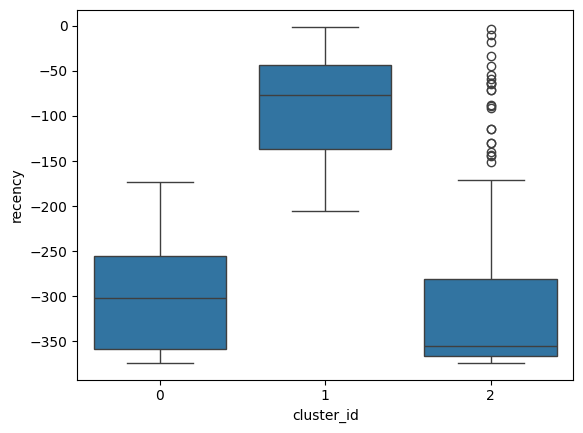

In [366]:
sns.boxplot(data=grouped_data,x='cluster_id',y='recency')

<Axes: xlabel='cluster_id', ylabel='amount'>

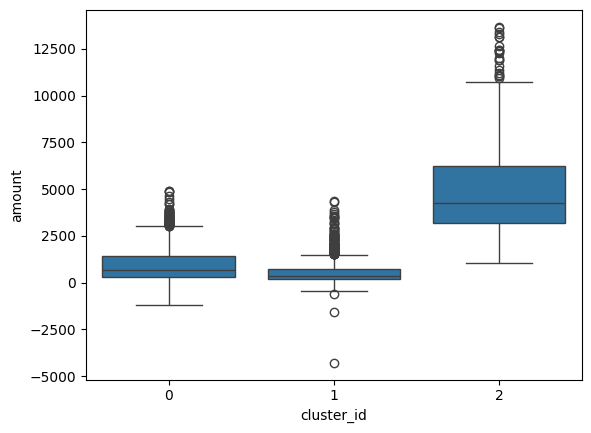

In [367]:
sns.boxplot(data=grouped_data,x='cluster_id',y='amount')

<Axes: xlabel='cluster_id', ylabel='frequency'>

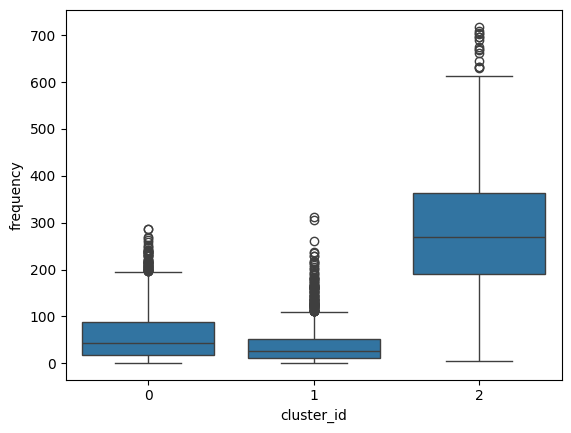

In [422]:
sns.boxplot(data=grouped_data,x='cluster_id',y='frequency')

In [424]:
from scipy.cluster.hierarchy import dendrogram

In [426]:
from scipy.cluster.hierarchy import linkage

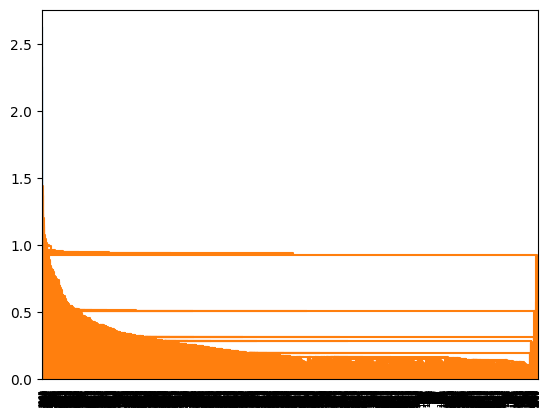

In [428]:
mergings = linkage(scaled_data, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()